<a href="https://colab.research.google.com/github/NainaniJatinZ/EvaluatingUnsupervisiedMLBlog/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

- **What is clustering?**

Clustering is a type of unsupervised learning which is used to split unlabeled data into different groups. Clustering is generally used in Data Analysis to get to know about the different groups that may exist in our dataset.





In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time

## Creating a testing dataset

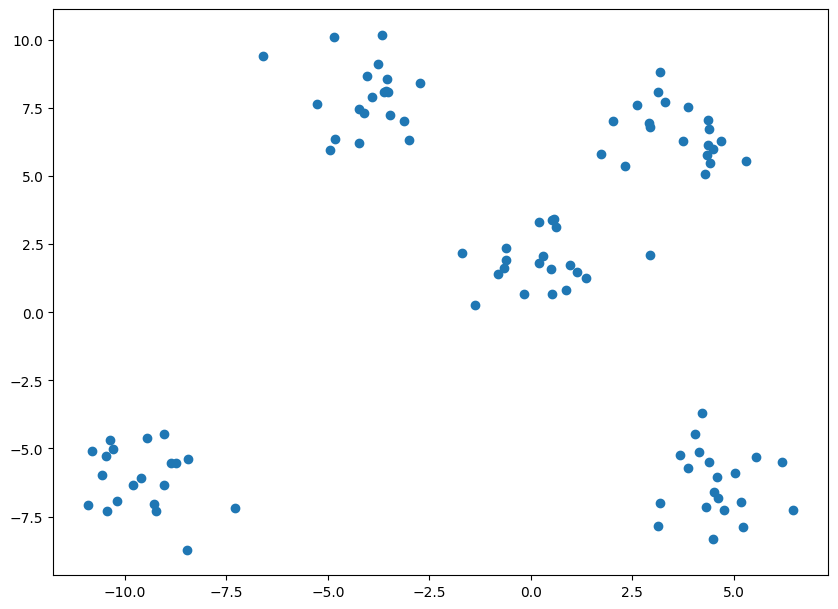

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=5, random_state=101)
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.scatter(X[:, 0], X[:, 1]);

In [ ]:
m=X.shape[0]
n=X.shape[1] 
n_iter=50

In [ ]:
X

In [ ]:
X1 = X[:, 0]
X2 = X[:, 1]

## K and Means?

## How to measure distance?

Euclidean distance is the most common metric. The formula for Euclidean distance for 2 dimensions is given by:

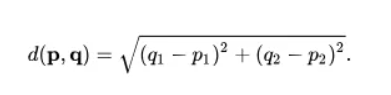

In [ ]:
# Calculate Euclidean distance between two observations
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5



In [ ]:
pointA_index = 13 #@param {type:"slider", min:0, max:100, step:1}
pointB_index = 74 #@param {type:"slider", min:0, max:100, step:1}
pointA = X[pointA_index] 
pointB = X[pointB_index]
temp_point_set = [[pointA[0], pointB[0]], [pointA[1], pointB[1]]]
tempDist = calc_distance(pointA, pointB)

Distance between point A and B is 7.2621477759624495


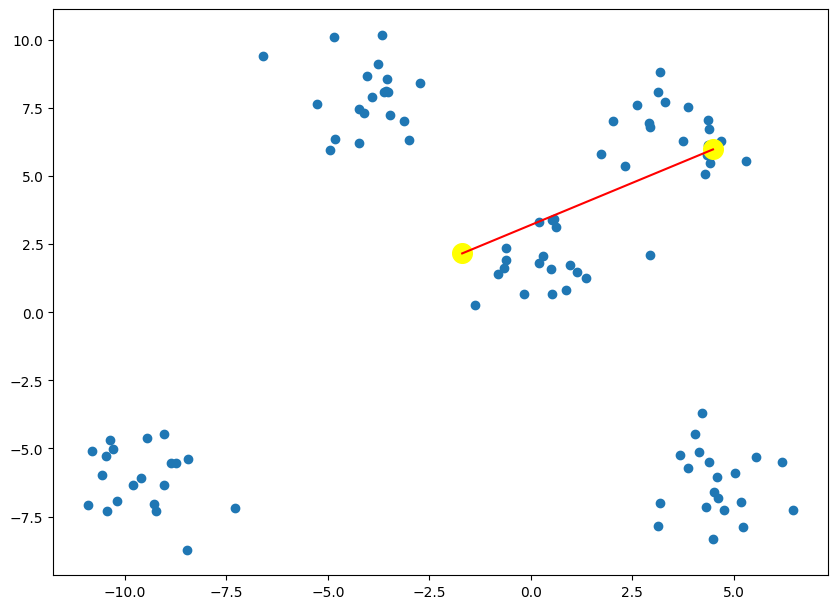

In [ ]:
#draw a line bw these two points to show distance
plt.scatter(X[:, 0], X[:, 1]);
plt.scatter(temp_point_set[0], temp_point_set[1],s=200, c= "yellow")
plt.plot([pointA[0], pointB[0]], [pointA[1], pointB[1]], c="red")
print("Distance between point A and B is "+ str(tempDist))

# Steps for the Algorithm

## Step 1: Initializing K random centroids 

In [ ]:
#Randomly assign K points as centroids show them as big
K=5
# creating an empty centroid array
centroids=np.array([]).reshape(n,0) 
# creating 5 random centroids
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]

In [ ]:
centroids.shape

(2, 5)

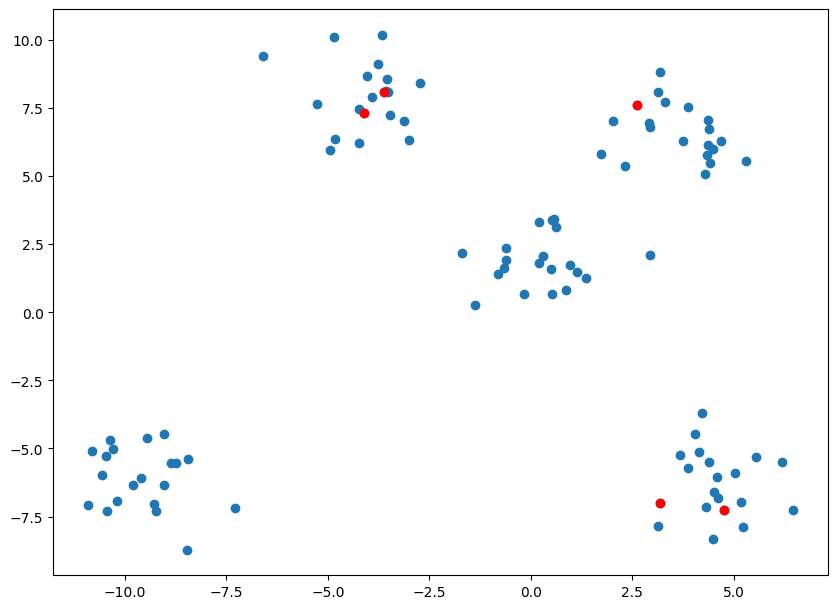

In [ ]:
plt.scatter(X[:, 0], X[:, 1]);
plt.scatter(centroids[0], centroids[1], c= "red")

## Step 2: Getting the minimum distance from each point to the centroids

In [ ]:

# creating an empty array
euclid=np.array([]).reshape(m,0)

# finding distance between data point and each centroid
for k in range(K):
       dist=np.sum((X-centroids[:,k])**2,axis=1)
       euclid=np.c_[euclid,dist]

# storing the minimum value we have computed
minimum=np.argmin(euclid,axis=1)+1

In [ ]:
minimum

array([1, 3, 2, 1, 5, 1, 5, 2, 3, 3, 5, 3, 3, 1, 5, 5, 5, 5, 2, 1, 2, 4,
       3, 1, 1, 1, 3, 4, 2, 5, 1, 5, 3, 3, 3, 3, 1, 4, 3, 5, 5, 2, 5, 5,
       5, 3, 1, 3, 3, 3, 1, 4, 5, 3, 1, 4, 5, 5, 2, 2, 3, 1, 5, 5, 2, 5,
       4, 2, 3, 4, 3, 4, 5, 4, 5, 1, 5, 4, 3, 5, 3, 2, 5, 3, 1, 5, 5, 5,
       3, 5, 2, 5, 1, 5, 3, 2, 1, 5, 5, 5])

## Step 3:Assigning each point to a centroid based on minimum distance

In [ ]:
#Creating an empty dictionary 
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)

In [ ]:
cent

{1: array([], shape=(2, 0), dtype=float64),
 2: array([], shape=(2, 0), dtype=float64),
 3: array([], shape=(2, 0), dtype=float64),
 4: array([], shape=(2, 0), dtype=float64),
 5: array([], shape=(2, 0), dtype=float64)}

In [ ]:
#Adding each data point to the respective cluster
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]

#Taking the transpose for better data handling
for k in range(K):
    cent[k+1]=cent[k+1].T

In [ ]:
cent

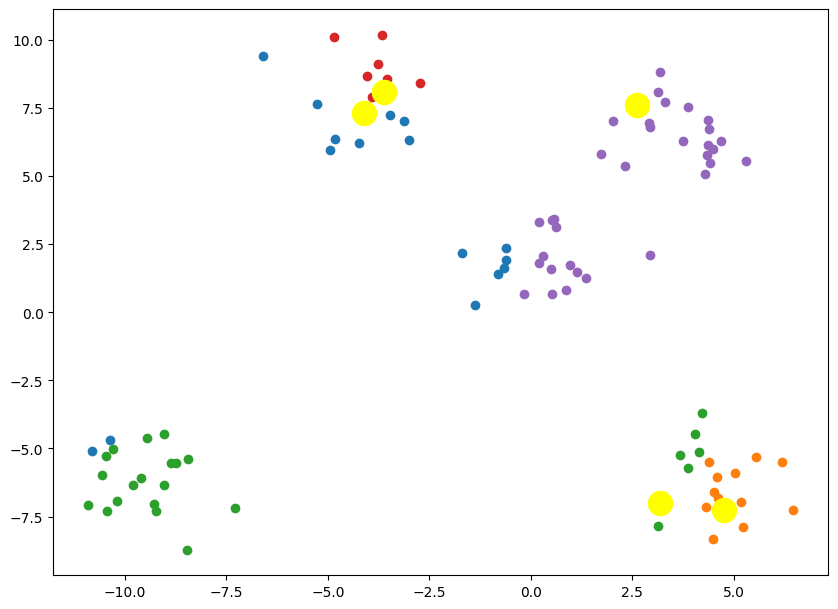

In [ ]:
#Seeing the current cluster after 1 iteration
for k in range(K):
    plt.scatter(cent[k+1][:,0],cent[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()

## Step 4: Updating the Centroids

In [ ]:
centroids_new = centroids.copy()
for k in range(K):
     centroids_new[:,k]=np.mean(cent[k+1],axis=0)

In [ ]:
centroids[0]

array([ 3.13695827,  6.46042142,  4.76174286, -2.72697262,  3.66494716])

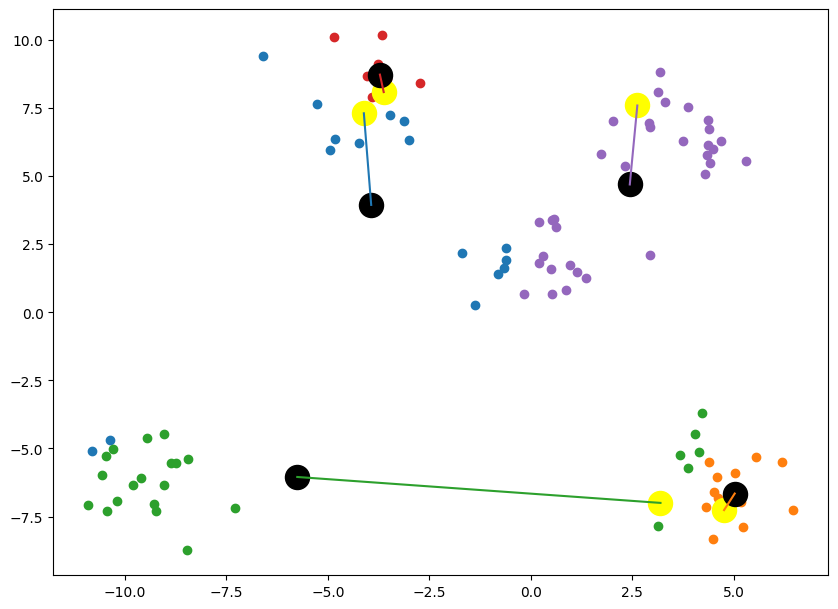

In [ ]:
#Observing the shift in Centroids 
for k in range(K):
    plt.scatter(cent[k+1][:,0],cent[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.scatter(centroids_new[0,:],centroids_new[1,:],s=300,c='black')
for k in range(K):
  plt.plot([centroids_new[0,k], centroids[0,k]], [centroids_new[1,k], centroids[1,k]])
plt.show()

## Step 5: Repeat steps 2-4 until the centroid keeps changing or till 'n_iter' Iterations  

## Iterating over the process

In [ ]:
K = 5
centroids=np.array([]).reshape(n,0) 
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]

In [ ]:
for i in range(n_iter):
      euclid=np.array([]).reshape(m,0)
      for k in range(K):
          dist=np.sum((X-centroids[:,k])**2,axis=1)
          euclid=np.c_[euclid,dist]
      C=np.argmin(euclid,axis=1)+1
      cent={}
      varianceTemp = []
      for k in range(K):
           cent[k+1]=np.array([]).reshape(2,0)
      for k in range(m):
           cent[C[k]]=np.c_[cent[C[k]],X[k]]
      for k in range(K):
           cent[k+1]=cent[k+1].T
      for k in range(K):
           centroids[:,k]=np.mean(cent[k+1],axis=0)
      final=cent

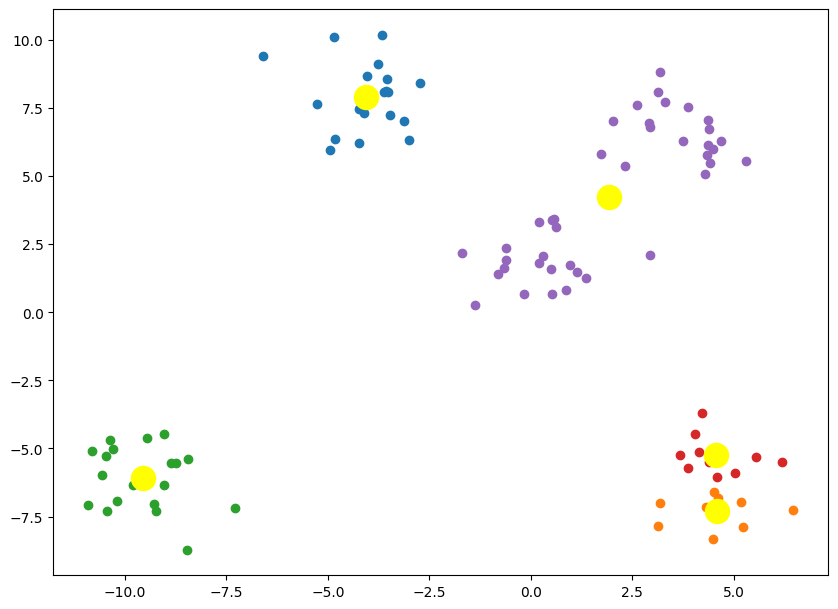

In [ ]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.show()

# Working with sklearn library

### Elbow method to determine the optimal value of K 

Sum of squares of distances of every data point from its corresponding cluster centroid which is called WCSS ( Within-Cluster Sums of Squares).

1. Perform K means clustering on different values of K ranging from 1 to any upper limit. Here we are taking the upper limit as 10.
2. For each K, calculate WCSS
3. Plot the value for WCSS with the number of clusters K.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. i.e the point after which WCSS doesn’t decrease more rapidly is the appropriate value of K.

In [ ]:
from sklearn.cluster import KMeans

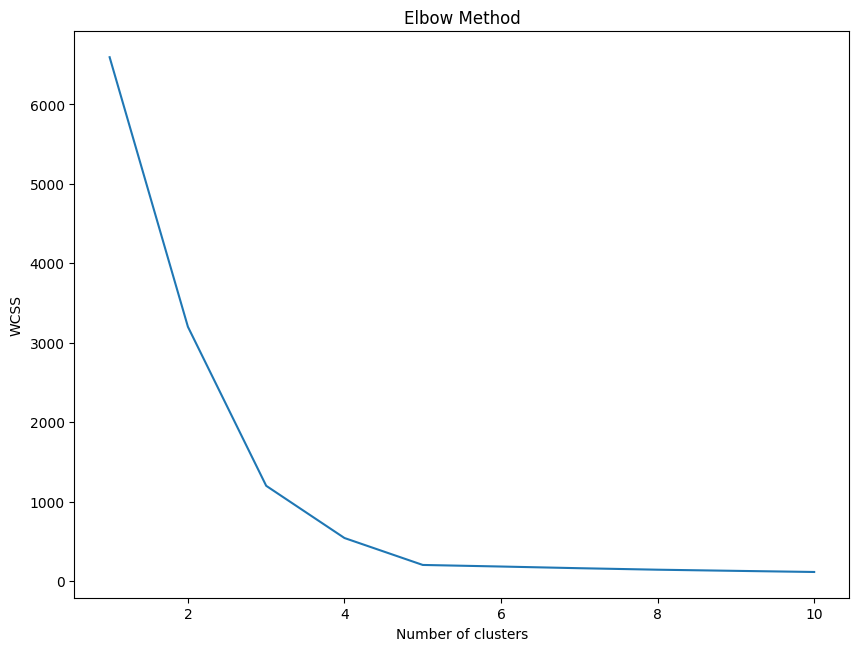

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # It is the sum of squared distances of samples to their closest cluster center.
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### Clustering with 3 features (3D)

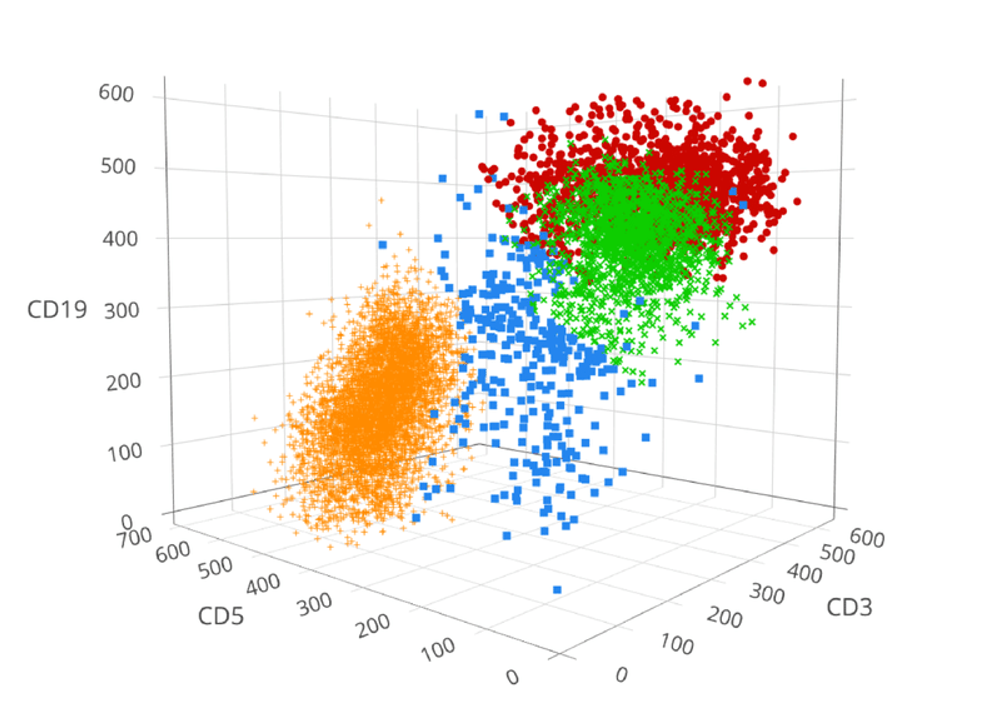

One disadvantage of the K-means algorithm is that it is sensitive to the initialization of the centroids or the mean points.





## Kmeans++ Steps:

1. Randomly select the first centroid from the data points.
2. For each data point compute its distance from the nearest, previously chosen centroid.
3. Select the next centroid from the data points such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid. (i.e. the point having maximum distance from the nearest centroid is most likely to be selected next as a centroid)
4. Repeat steps 2 and 3 until k centroids have been sampled

**TLDR: we pick up centroids that are far away from one another.**


This increases the chances of initially picking up centroids that lie in different clusters.

## Real world Case

[Link to dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [ ]:
mall_df = pd.read_csv("/content/Mall_Customers.csv")
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X_mall = mall_df[[ 'Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()
X_mall

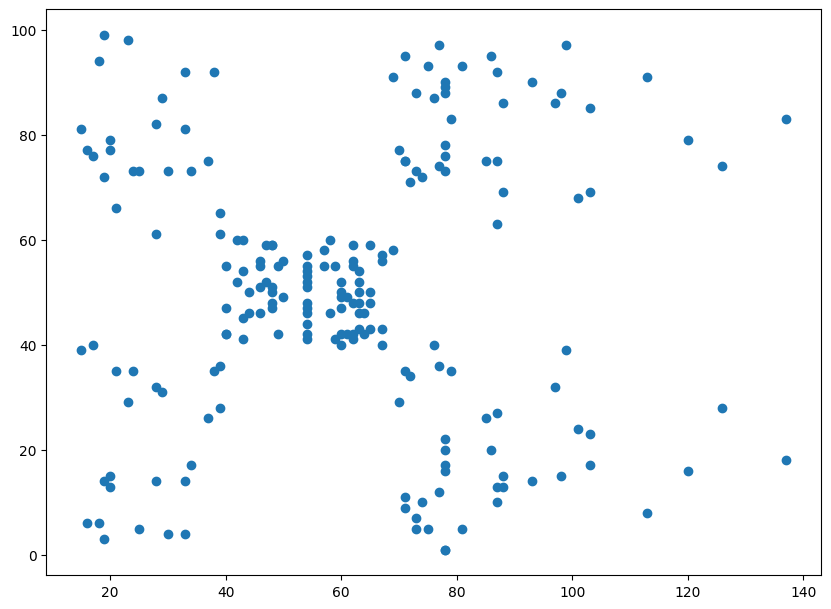

In [ ]:
plt.scatter(X_mall[:, 0], X_mall[:, 1]);

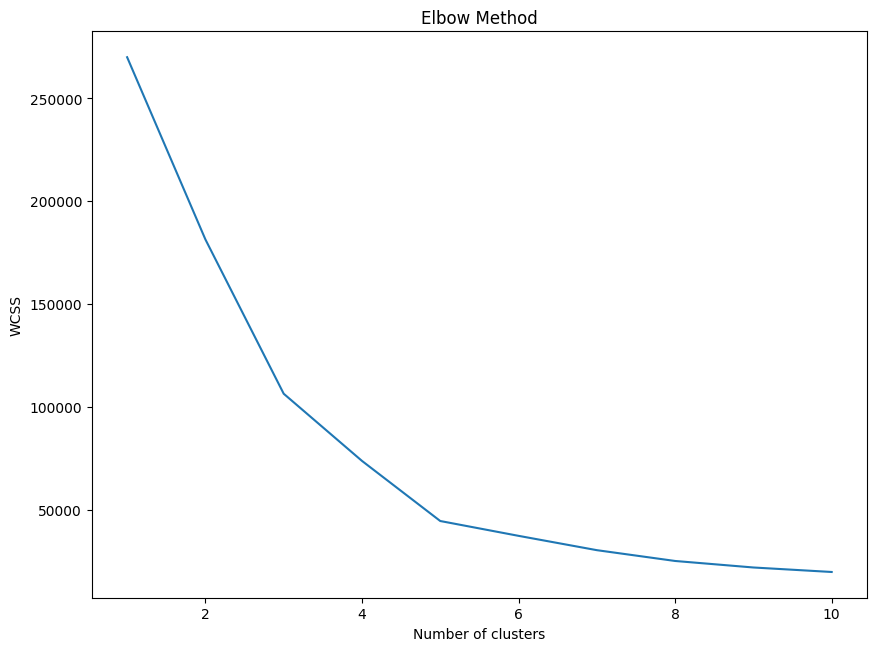

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_mall)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Now that we know what the optimal value of K is we can finalise it. 
- k-means++ ensures that you get don’t fall into the random initialization trap.

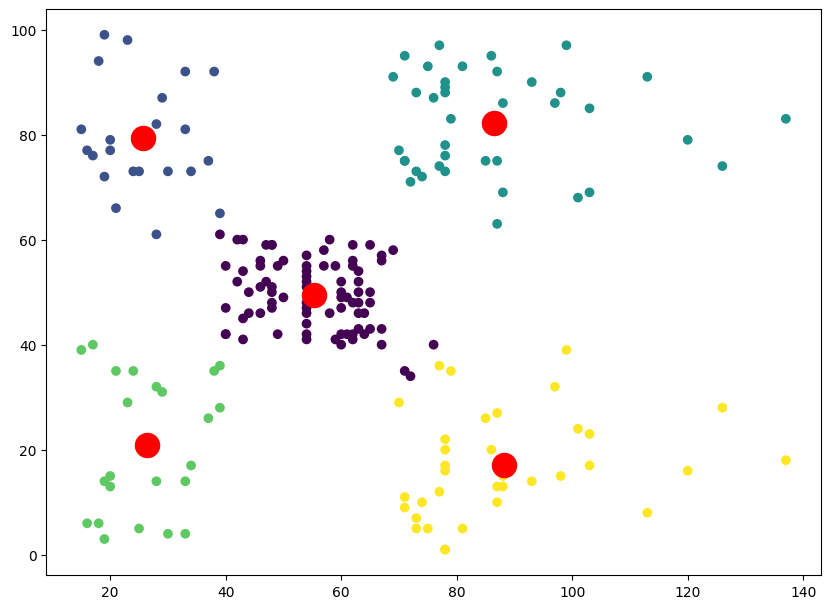

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_mall)
plt.scatter(X_mall[:,0], X_mall[:,1], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Fun Work: Try coding WCSS from scratch! 

The formula is given in the ppt. I believe that someone who is able to write an algorithm from scratch is completely thorough with the theory and math behind it! 

THANK YOU AND ALL THE BEST!

# References 

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- https://scikit-learn.org/stable/modules/clustering.html

- https://towardsdatascience.com/k-means-clustering-from-scratch-6a9d19cafc25

- https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42
